In [1]:
import numpy as np
from keras.datasets import mnist

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
import zipfile

In [4]:
with zipfile.PyZipFile("train_LbELtWX (4).zip", mode="r") as zip_module:
    zip_module.extractall()

In [5]:
with zipfile.PyZipFile("test_ScVgIM0.zip", mode="r") as zip_module:
    zip_module.extractall()

In [6]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 64D0-0165

 Directory of D:\Datascience\Analytic Vidya Hackathon\Identify the apparels (Fashion MNIST)

09-10-2022  08:11    <DIR>          .
09-10-2022  08:11    <DIR>          ..
08-10-2022  20:54    <DIR>          .ipynb_checkpoints
09-10-2022  08:11            11,707 Identify apparels.ipynb
08-10-2022  20:50            90,010 sample_submission_I5njJSF (1).csv
08-10-2022  21:10    <DIR>          test
09-10-2022  08:12            70,004 test.csv
08-10-2022  20:50        13,781,763 test_ScVgIM0.zip
08-10-2022  21:10    <DIR>          train
09-10-2022  08:11           468,903 train.csv
08-10-2022  20:51        82,498,602 train_LbELtWX (4).zip
               6 File(s)     96,920,989 bytes
               5 Dir(s)  131,997,200,384 bytes free


In [7]:
labels = pd.read_csv('./train.csv')
labels.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [8]:
train_img = cv2.imread('./train/1.png')

In [9]:
train_img.shape

(28, 28, 3)

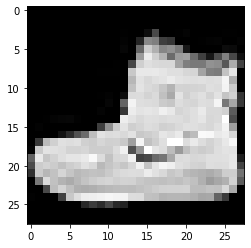

In [10]:
plt.imshow(train_img)

In [11]:
import numpy as np
targets = pd.Series(labels['label'])
one_hot = pd.get_dummies(targets)
one_hot_labels = np.asarray(one_hot)

In [12]:
one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


In [13]:
one_hot_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
img_rows=28
img_cols=28
num_channel=1
from tqdm import tqdm
#import cv2
x_feature = []
y_feature = []

i = 0 # initialisation
for f, img in tqdm(labels.values): # f for format ,jpg
    train_img = cv2.imread('./train/{}.png'.format(f),0)
    label = one_hot_labels[i]
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols)) 
    x_feature.append(train_img_resize)
    y_feature.append(label)
    i += 1

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [07:26<00:00, 134.41it/s]


In [15]:
x_train_data = np.array(x_feature, np.float32) / 255.   # /= 255 for normolisation
print (x_train_data.shape)
x_train_data = np.expand_dims(x_train_data, axis = 3) # for keras to given input to Conv2D layer
print (x_train_data.shape)
y_train_data = np.array(y_feature)
print(y_train_data.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(60000, 10)


In [16]:
submission = pd.read_csv('test.csv')
test_img = submission['id']
submission.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [17]:
.

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:03<00:00, 156.86it/s]


In [18]:
x_test_data = np.array(x_test_feature, np.float32) / 255. 
print (x_test_data.shape)
x_test_data = np.expand_dims(x_test_data, axis = 3)
print (x_test_data.shape)

(10000, 28, 28)
(10000, 28, 28, 1)


In [19]:
import tensorflow as tf

In [20]:
def squeeze_excite_block(filters,input):                      
    se = tf.keras.layers.GlobalAveragePooling2D()(input)
    se = tf.keras.layers.Reshape((1, filters))(se) 
    se = tf.keras.layers.Dense(filters//16, activation='relu')(se)
    se = tf.keras.layers.Dense(filters, activation='sigmoid')(se)
    se = tf.keras.layers.multiply([input, se])
    return se

In [21]:
def make_model():
        s = tf.keras.Input(shape=x_train_data.shape[1:]) 
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(s)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)          


        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)


        x = tf.keras.layers.concatenate([tf.keras.layers.GlobalMaxPooling2D()(x),
                                         tf.keras.layers.GlobalAveragePooling2D()(x)])

        x = tf.keras.layers.Dense(10,activation='softmax',use_bias=False,
                                  kernel_regularizer=tf.keras.regularizers.l1(0.00025))(x)
        return tf.keras.Model(inputs=s, outputs=x)

In [22]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, shear_range=10,
                        height_shift_range=0.1, zoom_range=0.2)
datagen.fit(x_train_data)

In [ ]:
batch_size=32
supermodel=[]
for i in range(5):
        np.random.seed(i)
        model=make_model()                
        model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=batch_size,shuffle=True),
                    steps_per_epoch=len(x_train_data) / batch_size, epochs=15,verbose=0)
        model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=batch_size,shuffle=True),
                    steps_per_epoch=len(x_train_data) / batch_size, epochs=3,verbose=0)
        model.compile(optimizer=optimizers.Adam(lr=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=batch_size,shuffle=True),
                    steps_per_epoch=len(x_train_data) / batch_size, epochs=3,verbose=0)
        model.fit(x_train_data, y_train_data, batch_size=batch_size,shuffle=True, epochs=1,verbose=0)
        supermodel.append(model)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\RAJKUMAR\AppData\Local\Temp/ipykernel_10708/2148566667.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=batch_size,shuffle=True),
C:\Users\RAJKUMAR\AppData\Local\Temp/ipykernel_10708/2148566667.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=batch_size,shuffle=True),
C:\Users\RAJKUMAR\AppData\Local\Temp/ipykernel_10708/2148566667.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use

In [ ]:
pred =np.asarray([a.predict(x_test_data) for a in supermodel])
predictions = np.argmax(np.mean(pred,axis=0),axis=1)

In [ ]:
predict = pd.DataFrame(data=predictions ,columns=["label"])